# Time Series Forecasting: Daily Covid Cases in the US

## Data Description

The given data consists of daily new Covid cases in United States from January 2020 to January 2022. The data has been sourced from https://ourworldindata.org/covid-cases. The number of new COVID-19 cases in the country continues to report soaring rates of new infections due to the rapid spread of the highly transmissible omicron variant. This projects aims to forecast the number of new cases going ahead in 2022 and also try to determine when will this new wave due to the omicron variant come to an end. The reason for choosing this dataset is that Covid is something that has become a part of everone's life and people have questions regarding how long this pandemic is going to last. The variations in the data is due to the multiplicative factor by which the virus continues to spread. This can lead to an exponential pattern in which the virus is spreading and can be forecasted well using time series forecasting methods.

## Data Importing and Preprocessing

In [1]:
#importing libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/rajesh/downloads/covid.csv')

In [3]:
df.head()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,USA,United States,2020-01-22,1,NaN,NaN,NaN,NaN,NaN,0.003,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
1,USA,United States,2020-01-23,1,0.0,NaN,NaN,NaN,NaN,0.003,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2,USA,United States,2020-01-24,2,1.0,NaN,NaN,NaN,NaN,0.006,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
3,USA,United States,2020-01-25,2,0.0,NaN,NaN,NaN,NaN,0.006,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
4,USA,United States,2020-01-26,5,3.0,NaN,NaN,NaN,NaN,0.015,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


The above data shows total cases and daily new cases for the United States on a daily basis starting January 22, 2020. Here, new cases for the first day is NaN, we need to replace it with 1.

In [4]:
# Replacing new cases for the first day
df['new_cases'][0] = 1
df.head()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,USA,United States,2020-01-22,1,1.0,NaN,NaN,NaN,NaN,0.003,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
1,USA,United States,2020-01-23,1,0.0,NaN,NaN,NaN,NaN,0.003,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2,USA,United States,2020-01-24,2,1.0,NaN,NaN,NaN,NaN,0.006,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
3,USA,United States,2020-01-25,2,0.0,NaN,NaN,NaN,NaN,0.006,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
4,USA,United States,2020-01-26,5,3.0,NaN,NaN,NaN,NaN,0.015,...,9.732,54225.446,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [5]:
#Checking for null values in the data
df.isnull().sum()

iso_code                            0
location                            0
date                                0
total_cases                         0
new_cases                           0
new_cases_smoothed                  6
total_deaths                       38
new_deaths                         38
new_deaths_smoothed                38
total_cases_per_million             0
new_cases_per_million               1
new_cases_smoothed_per_million      6
stringency_index                    2
population                          0
population_density                  0
median_age                          0
aged_70_older                       0
gdp_per_capita                      0
cardiovasc_death_rate               0
diabetes_prevalence                 0
female_smokers                      0
male_smokers                        0
handwashing_facilities            744
hospital_beds_per_thousand          0
life_expectancy                     0
human_development_index             0
dtype: int64

The data is clean and has no null values. Since the data is only for United States, we can drop the location column.

In [6]:
#dropping location
df = df.drop('location',axis=1)

In [7]:
#Checking for data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 25 columns):
iso_code                          744 non-null object
date                              744 non-null object
total_cases                       744 non-null int64
new_cases                         744 non-null float64
new_cases_smoothed                738 non-null float64
total_deaths                      706 non-null float64
new_deaths                        706 non-null float64
new_deaths_smoothed               706 non-null float64
total_cases_per_million           744 non-null float64
new_cases_per_million             743 non-null float64
new_cases_smoothed_per_million    738 non-null float64
stringency_index                  742 non-null float64
population                        744 non-null int64
population_density                744 non-null float64
median_age                        744 non-null float64
aged_70_older                     744 non-null float64
gdp_per_capita       

We would need to change the data type of date and new cases.

In [8]:
#changing data types
df['date']= pd.to_datetime(df['date'])
df['new_cases']=df['new_cases'].astype('int')

In [9]:
print('Time period start: {}\nTime period end: {}'.format(df.date.min(),df.date.max()))

Time period start: 2020-01-22 00:00:00
Time period end: 2022-02-03 00:00:00


We can see that the data is from 22 January 2020 to February 23 2022.

In [10]:
df.shape

(744, 25)

There are total 764 days of data

In [11]:
#Checking for some basic statistics
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.440000e+02,7.440000e+02,738.000000,706.000000,706.000000,706.000000,744.000000,743.000000,738.000000,742.000000,...,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,0.0,7.440000e+02,7.440000e+02,7.440000e+02
mean,2.319419e+07,1.021005e+05,101561.209238,425723.453258,1269.910765,1258.856516,69669.987590,307.099001,305.066419,57.997601,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01
std,1.926551e+07,1.494797e+05,136232.296197,265082.453598,966.774529,783.976330,57869.132077,449.163618,409.210351,16.323806,...,2.666328e-14,4.368511e-11,2.986287e-12,3.199593e-14,2.381919e-13,7.821228e-14,NaN,1.510919e-14,4.692737e-13,4.888268e-15
min,1.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.143000,0.003000,0.000000,0.000000,0.000000,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01
25%,4.207094e+06,2.749950e+04,28581.786000,176657.500000,522.000000,716.106750,12637.138750,82.695500,85.853000,52.310000,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01
50%,2.583301e+07,5.544150e+04,62191.000000,488670.000000,1007.500000,1038.785500,77596.382500,166.664000,186.807500,61.570000,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01
75%,3.516839e+07,1.225528e+05,121768.714500,618621.250000,1832.250000,1728.892750,105637.710750,368.438000,365.765500,68.980000,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01
max,7.596275e+07,1.368873e+06,802698.857000,896557.000000,4442.000000,3403.000000,228174.555000,4111.778000,2411.122000,75.460000,...,9.732000e+00,5.422545e+04,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01


In [12]:
#Setting date column as index of the dataframe
df = df.set_index('date')

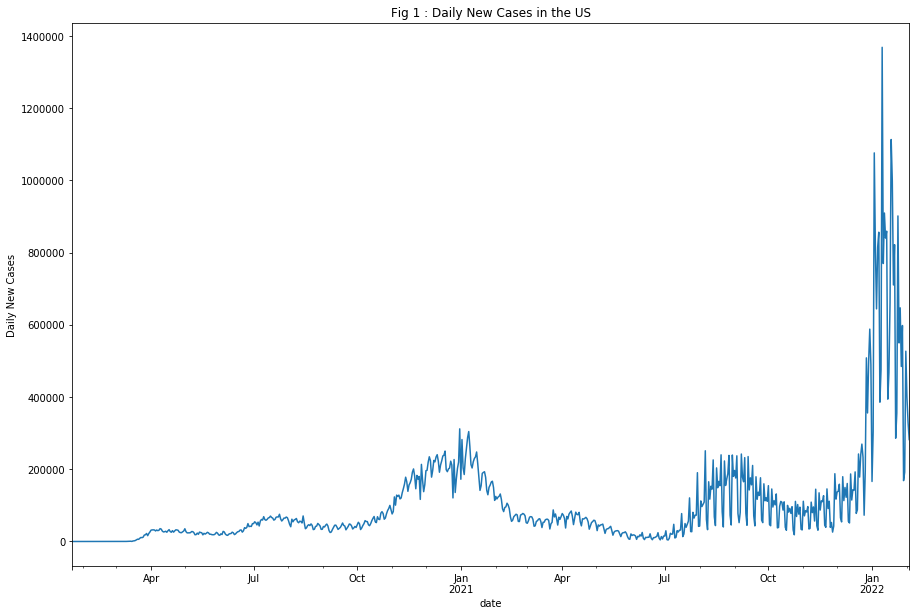

In [13]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Fig 1 : Daily New Cases in the US')
df['new_cases'].plot()
plt.show()

We can see that the daily new cases started to increase gradually through 2020 and then went up exponentially around early part of 2021. We saw a third wave of the virus in the third quarter of 2021. Due to the outbreak of the Omicron variant, we saw a big spike in terms of the number of new cases in early 2022.

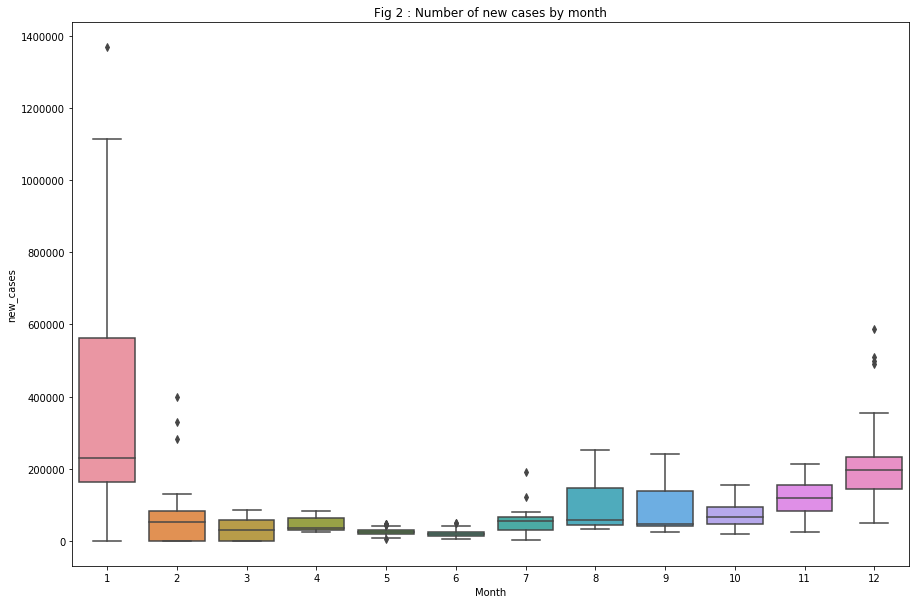

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(df.index.month, df['new_cases'])
plt.xlabel('Month')
plt.title('Fig 2 : Number of new cases by month')
plt.show()

The above chart shows the distribution of number of daily cases month wise. Since we have almost seen 2 complete years of Covid 19, the box plots are showing aggregation results for each month. Clearly, the month of January has seen the highest number of cases followed by August and September.

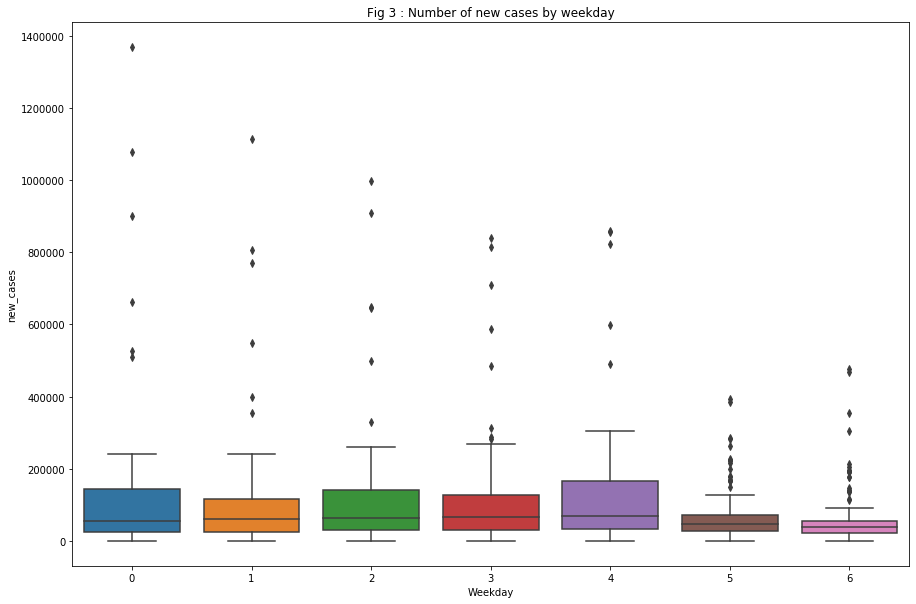

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(df.index.weekday, df['new_cases'])
plt.xlabel('Weekday')
plt.title('Fig 3 : Number of new cases by weekday')
plt.show()

Here 0 stands for Monday and 6 represents Sunday. We can observe a weekly seasonality in this time series with Saturdays and Sundays having comparatively lesser new cases as compared to weekdays.

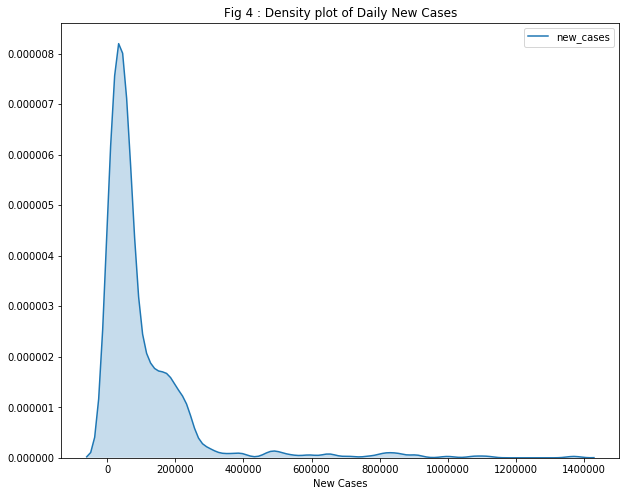

In [16]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['new_cases'],shade=True)
plt.title('Fig 4 : Density plot of Daily New Cases')
plt.xlabel('New Cases')
plt.show()

The density plot above shows the distribution of the number of cases. We can see that the major frequency lies in the region less than 200k

## ARIMA Modeling

In order to fit an ARIMA model, we need to make the time series mean and variance stationary. Looking at figure 1 above, we can conclude that the series is not variance stationary. We will run some tests later on to test the mean stationarity.

### Making the series variance stationary by applying a log transformation

In [17]:
#applying log transformation
ln_df = np.log(df)

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [ ]:
ln_df.head()

Here, we are observing infinity as log transformation of 0. Since January and February 2020 were early days for the virus to spread, we can replace 0s with 1 for these 2 months and reapply a log transformation.

In [ ]:
df[df['new_cases']==0]=1
df.head()

In [ ]:
#reapplying log transformation
ln_df = np.log(df)
ln_df.head()

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Log Daily New Cases')
plt.title('Fig 5 : Variance Stationarized New Cases in the US')
ln_df['new_cases'].plot()
plt.show()

We can observe that the time series is now variance stationary. However, we need to check whether it is mean stationary.

### Checking for mean stationarity

In [ ]:
# Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(ln_df)

The p value obtained is 4.45e-06 , which is lower than 0.05. This indicates that the data is mean stationary.

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
kpss(ln_df)

The p value obtained is 0.01 (less than 0.05), which indicates that the data is mean non stationary

### Calculating first difference to make the series mean stationary

In [ ]:
df_diff = pd.DataFrame(ln_df['new_cases'] - ln_df['new_cases'].shift(1))
df_diff.head()

In [ ]:
#removing missing value
df_diff = df_diff.dropna()
df_diff.head()

In [ ]:
# Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(df_diff)

The p-value of the ADF test now comes out to be 0.01, which indicates mean stationary data.

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
kpss(df_diff)

The p-value of the KPSS test now comes out to be greater than 0.05, which indicates mean stationary data.

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Log Daily New Cases')
plt.title('Fig 6 : Mean & Variance Stationarized New Cases in the US')
df_diff['new_cases'].plot()
plt.show()

As seen in the above plot, the time series now seems to be both mean and variance stationary.

### Plotting ACF and PACF

In [ ]:
#plotting acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff)
plt.title('Fig 7 : ACF Plot')
plt.show()

The ACF shows high correlation as well as dampening effect at every 7th lag, which indicates a weekly seasonality. Since we can see 3 time series elements show correlation more than the significance level, it looks like a MA 3 process.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_diff)
plt.title('Fig 8 : PACF Plot')
plt.show()

Since we can see 2 time series elements show correlation more than the significance level, it looks like a AR 2 process.

### Plotting ARIMA Models

In [ ]:
# Model 1 (2,1,3)
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(ln_df['new_cases'], order=(3,1,2))
model1_fit = model1.fit(disp=1)
print(model1_fit.summary())

In [ ]:
# Model 2 (2,2,3)
model2 = ARIMA(ln_df['new_cases'], order=(2,1,0))
model2_fit = model2.fit()
print(model2_fit.summary())

In [ ]:
# Model 3 (4,1,3)
model3 = ARIMA(ln_df['new_cases'], order=(4,1,3))
model3_fit = model3.fit()
print(model3_fit.summary())

In [ ]:
# Model 4 (3,2,2)
model4 = ARIMA(ln_df['new_cases'], order=(3,2,2))
model4_fit = model4.fit()
print(model4_fit.summary())

Based on the 4 ARIMA models fit, Model 3 ARIMA (4,1,3) is the best model according to AIC and BIC both

### Fitting an Auto ARIMA Model

In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(ln_df['new_cases'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(ln_df['new_cases'])

Auto ARIMA suggests order of (5,2,2) as the best model.

In [ ]:
# fitting the best model (5,2,2)
model5 = ARIMA(ln_df['new_cases'], order=(5,2,2))
model5_fit = model5.fit()
print(model5_fit.summary())

In [ ]:
# Plotting the predicted and actual values using best model
fig, ax = plt.subplots(figsize = (15,8))
ax.set_xlabel('Date')
ax.set_ylabel('Number of New Cases (Log Transformed)')
model5_fit.plot_predict(5, ax = ax)
plt.title('Fig 9 : Actual vs Predicted')
plt.show()

The plot shows that the predicted and original data seem close to each other. The model looks like a good fit.

### Residual Analysis

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Fig 10 : Residual Plot')
residuals = pd.DataFrame(model5_fit.resid)
plt.plot(residuals)
plt.show()

As seen from the above chart, the residuals look like white noise having no autocorrelation

In [ ]:
#examining acf of residuals
plot_acf(residuals)
plt.title('Fig 11 : ACF of residuals')
plt.show()

In [ ]:
#examining pacf of residuals
plot_pacf(residuals)
plt.title('Fig 11 : PACF of residuals')
plt.show()

The PACF does not show any significant autocorrelation among the residuals. We can confirm the same by applying a Box Ljung Test.

In [ ]:
# applying Box Ljung Test
import statsmodels.api as sm
ljung = sm.stats.acorr_ljungbox(residuals, lags= 5)
p_value = ljung[1][-1] * 10000000000000
print('p value obtained is ',p_value)

The p value of Box Ljung test is greater than 0.05, which indicates that the residuals are independent.

### Evaluating in sample performance through RMSE

In [ ]:
# getting predictions and taking inverse of log to get back to original scale
predictions = pd.DataFrame(model5_fit.predict())
predictions.columns = ['Prediction']
predictions['Prediction'] = np.exp(predictions['Prediction'])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(df['new_cases'][2:], predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

In [ ]:
# generating foreacasts for the next 30 days
n=30
forecast,err,ci = model5_fit.forecast(steps=n)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2022/01/20', periods=n))

In [ ]:
#taking inverse of log to get back to original scale
df_forecast['forecast'] = np.exp(df_forecast['forecast'])
df_forecast.head()

In [ ]:
ax = df.plot(label='observed', figsize=(20, 15))
df_forecast.plot(ax=ax,label='Forecast',color='r')
ax.fill_between(df_forecast.index,
                ci[:,0],
                ci[:,1], color='b', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
plt.title('Fig 12 : Forecasting new cases for next 30 days')
plt.legend()
plt.show()

## Facebook Prophet Model

In [ ]:
# initializing Prophet Model
from fbprophet import Prophet
model = Prophet()

In [ ]:
#creating a new dataframe and renaming the columns of the dataframe
dfb = df.reset_index()
dfb.columns=['ds','y']
model.fit(dfb)

In [ ]:
# Create Future dates
future = model.make_future_dataframe(periods=365)

# Predict Prices
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

The model successfully forecasted the number of new cases for the next 365 days. We can see the forecasted values of the time series for the last 5 days of the forecasted period along with their upper and lower bound.

In [ ]:
#visualizing the forecasted values
import matplotlib.pyplot as plt
model.plot(forecast)
plt.title('Fig 13: Visualization of Forecasted values')
plt.show()

The above plot shows that the model does a good job in forecasting the in sample values of the time series.

The model should not take into account a saturating minimum or maximum point since all the values forecasted by the model are reasonable enough.

In [ ]:
# visualizing components of the time series
model.plot_components(forecast)
plt.title('Fig 14: Visualizing components of time series')
plt.show()

It is quite evident that COVID 19 daily cases follow a weekly seasonality. As we can see in the above chart, there are less number of new cases on weekends as compared to weekdays.

In [ ]:
# calculating in sample RMSE
yhat = forecast[:-365]['yhat']
y = dfb['y']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

### Changepoint Analysis

In [ ]:
#listing the potential changepoints
model.changepoints

In [ ]:
#visualizing the potential changepoints
figure = model.plot(forecast)
for changepoint in model.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)
    plt.title('Fig 15: Visualizing the potential changepoints')

In [ ]:
# visualizing the rate change of all potential changepoints
deltas = model.params['delta'].mean(0)
fig = plt.figure(figsize=(10,8))
plt.bar(range(len(deltas)),deltas)
plt.ylabel('Rate change')
plt.xlabel('Potential changepoint')
plt.title('Fig 16: Rate Change of Potential Changepoints')
plt.show()

We can see that the last 5 changepoints have the most significant rate changes, and hence are contributing most to the trend. Apart from these, changepoints 13,14 and 15 are also contributing to the trend.

In [ ]:
#visualizing the significant changepoints
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.title('Fig 17: Significant Changepoints')
plt.show()

As highlighted above, total 8 changepoints are contributing significantly towards the trend of the time series

In [ ]:
#examining performance with 50 changepoints
model = Prophet(n_changepoints=50)
forecast = model.fit(dfb).predict(future)
fig = model.plot(forecast)
plt.title('Fig 18: Examining the performance with 50 changepoints')

In [ ]:
# in sample RMSE
yhat = forecast[:-365]['yhat']
y = dfb['y']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

In sample RMSE of the model with 50 changepoints is higher than the model with 25 changepoints. We would go ahead with 25 changepoints.

### Seasonality Assessment

In [ ]:
model.plot_components(forecast)
plt.title('Fig 19: Seasonality Assessment')
plt.show()

As concluded above as well, the time series follows a weekly seasonality. We need to examine further to understand whether it is additive seasonality or multiplicative seasonality.

In [ ]:
#examining additive seasonality
model = Prophet(seasonality_mode='additive')
forecast = model.fit(dfb).predict(future)
fig = model.plot(forecast)
plt.title('Fig 20: Examining additive seasonality')
plt.show()

In [ ]:
model.plot_components(forecast)
plt.title('Fig 20: Trend vs seasonality')
plt.show()

From the above decomposition chart, we can observe that the trend is driving the forecasted values more as compared to the seasonality.

In [ ]:
# calculating in sample RMSE
yhat = forecast[:-365]['yhat']
y = dfb['y']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

In [ ]:
#examining multiplicative seasonality
model = Prophet(seasonality_mode='multiplicative')
forecast = model.fit(dfb).predict(future)
fig = model.plot(forecast)
plt.title('Fig 21: Examining multiplicative seasonality')
plt.show()

We can see that the variance of the values forecasted by mutliplicative seasonality keeps on increasing with time

In [ ]:
model.plot_components(forecast)
plt.show()

In [ ]:
# in sample RMSE
yhat = forecast[:-365]['yhat']
y = dfb['y']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

The in sample RMSE of multiplicative seasonality is slightly lower than the additive seasonality. However, difference in performance is not significant enough to prefer multiplicative seasonality over additive seasonality as the model will become more difficult to interpret. Hence, we would go ahead with additive seasonality.

### Assessment and inclusion of holidays

In [ ]:
import holidays
holidays = pd.DataFrame(holidays.UnitedStates(years=[2020,2021,2022,2023]).items())
holidays.columns = ['ds','holiday']

In [ ]:
model = Prophet(holidays=holidays)
model.add_country_holidays(country_name='US')
model.fit(dfb)

In [ ]:
forecast = model.predict(future)
model.plot(forecast)
plt.title('Fig 22: Holiday Forecast')
plt.show()

In [ ]:
forecast[:-365].tail()

In [ ]:
model.plot_components(forecast)
plt.title('Fig 23: Components of Model')
plt.show()

On observing the holiday component, we can conclude that most of the holidays have a negative impact on the number of new cases. A few holidays (yearly twice) have a positive impact on the number of new cases.

In [ ]:
# in sample RMSE
yhat = forecast[:-365]['yhat']
y = dfb['y']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

The in sample RMSE of the model after including holidays has improved.

### Cross Validation

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '360 days', period='30 days', horizon = '30 days')
df_cv.head()

The model has fit data for 12 cut off points for an initial training period of 360 days, period of 30 days and horizon of 30 days.

In [ ]:
#examining performance metrics of cross validation models
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.title('Fig 24: RMSE vs Horizon')
plt.show()

As seen from the above chart, the RMSE of the model increases with increase in horizon which is expected because time series models are better at predicting near point in the future as compared to predicted a point which is far away into the future.

## ARIMA vs Facebook Prophet

In [ ]:
# splitting time series into train and test
train = df[:600]
test = df[600:]

We have split our data into training and testing dataset with first 600 days in train and the next 129 days in test.

## Fitting best ARIMA Model

The best ARIMA model obtained was ARIMA(5,2,2). We will fit that

In [ ]:
# taking log of train data
ln_train = np.log(train)
ln_train.head()

In [ ]:
# fitting the best model (5,2,2)
arima = ARIMA(ln_train['new_cases'], order=(5,2,2))
arima_fit = arima.fit()
print(arima_fit.summary())

In [ ]:
# generating foreacasts for the next 129 days
n=129
forecast,err,ci = arima_fit.forecast(steps=n)
arima_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2021/09/13', periods=n))

In [ ]:
#taking inverse of log to get back to original scale
arima_forecast['forecast'] = np.exp(arima_forecast['forecast'])
arima_forecast.head()

In [ ]:
# Calculating RMSE
yhat = arima_forecast['forecast']
y = test['new_cases']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

In [ ]:
#calculating MAE
MAE = np.abs((yhat - y)).mean()
MAE

In [ ]:
#calculating MAPE
MAPE = np.abs((yhat - y)/y).mean()
MAPE

### Fitting best FB Prophet Model

The best FB Prophet model obtained was the model with additive weekly seasonality which included holiday impact as well.

In [ ]:
fb_train = train.reset_index()
fb_train.columns = ['ds','y']

In [ ]:
# fitting the model
fb_model = Prophet(holidays=holidays)
fb_model.add_country_holidays(country_name='US')
fb_model.fit(fb_train)

In [ ]:
# Create Future dates and forecasting
future = model.make_future_dataframe(periods=0)

# Predict Prices
fb_forecast = model.predict(future)
fb_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# Calculating RMSE
yhat = fb_forecast['yhat'].values[600:]
y = test['new_cases']
RMSE = np.sqrt((np.power((yhat - y),2)).mean())
RMSE

In [ ]:
#calculating MAE
MAE = np.abs((yhat - y)).mean()
MAE

In [ ]:
#calculating MAPE
MAPE = np.abs((yhat - y)/y).mean()
MAPE

On comparing FB Prophet and ARIMA models above, both RMSE and MAE for out of sample data are better for FB Prophet whereas MAPE is better for ARIMA model. Considering these stats, we would say that FB Prophet performs better as compared to ARIMA model.